In [1]:
import pandas as pd
import numpy as np

In [7]:
df=pd.read_csv('train.csv',encoding='latin-1')

In [8]:
df.head(10)

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
5,6,0,or i just worry too much?
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
7,8,0,Sunny Again Work Tomorrow :-| ...
8,9,1,handed in my uniform today . i miss you ...
9,10,1,hmmmm.... i wonder how she my number @-)


In [11]:
df = df.drop(['ItemID'],axis = 1)

In [12]:
df.head()

,Sentiment,SentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...


## Visualizing the sentiment counts

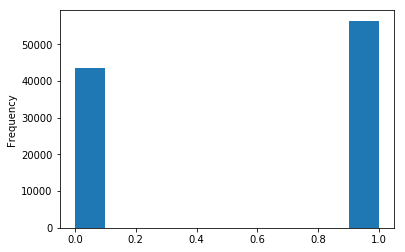

99989

In [60]:
import matplotlib.pyplot as plt 
df['Sentiment'].plot(kind='hist')
plt.show()
len(df.Sentiment)

## Function for cleaning the tweets

In [65]:
df = df.head(1000)
import re
def clean_tweet(tweet):
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", "",tweet.lower()).split())

In [66]:
for i in range(1000):
    df['SentimentText'][i] = clean_tweet(df['SentimentText'][i])

C:\Users\admin\Anaconda31\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\admin\Anaconda31\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


## Cleaned tweets

In [67]:
df.head(10)

,Sentiment,SentimentText
0,0,is so sad for my apl friend
1,0,i missed the new moon trailer
2,1,omg its already 730 o
3,0,omgaga im sooo im gunna cry ive been at this d...
4,0,i think mi bf is cheating on me tt
5,0,or i just worry too much
6,1,juuuuuuuuuuuuuuuuussssst chillin
7,0,sunny again work tomorrow tv tonight
8,1,handed in my uniform today i miss you already
9,1,hmmmm i wonder how she my number


In [68]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
stopset = set(stopwords.words('english'))
vectorizer = TfidfVectorizer(use_idf=True,lowercase=True,strip_accents='ascii',stop_words=stopset)

In [71]:
X = vectorizer.fit_transform(df.SentimentText)
y = df.Sentiment
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=27)

## Fitting the dataset into Multinomial Naive Bayes classifier

In [72]:
from sklearn import naive_bayes
clf = naive_bayes.MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [73]:
print ("Testing accuracy is : ",clf.score(X_test,y_test))

Testing accuracy is :  0.7133333333333334


In [74]:
from sklearn.metrics import accuracy_score
print ("Training accuracy is : ",accuracy_score(clf.predict(X_train),y_train))

Training accuracy is :  0.8628571428571429
